# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### 0. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [28]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds[["isNew", "rooms", "bathrooms", "surface", "price", "date", "level5"]]
ds.head(10)

,isNew,rooms,bathrooms,surface,price,date,level5
0,False,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
1,False,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
2,False,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,Boadilla del Monte
3,False,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
4,False,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
5,False,2.0,1.0,70.0,315000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
6,False,3.0,2.0,145.0,430000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
7,False,2.0,1.0,95.0,275000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
8,False,4.0,3.0,277.0,445000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
9,False,4.0,2.0,129.0,350000,2019-12-28T13:30:00Z,Madrid Capital


#### 1. Change the datatype of the columns of the DataFrame as the following (★☆☆)

| Column | Data type |
| -------| --------- |
| isNew | Boolean |
| rooms | Integer |
| bathrooms | Integer |
| surface | Float |
| price | Integer |
| date | String format %Y-%m-%d %H:%M:%S |
| level5 | String |

Ensure the current datatype of the columns match the desired and, if not, update it.

In [32]:
# TODO
ds = ds.dropna()
ds["rooms"] = ds["rooms"].astype(int)
ds["bathrooms"] = ds["bathrooms"].astype(int)
ds['date'] = ds['date'].astype(str)
ds['date'] = pd.to_datetime(ds['date'], format='ISO8601')
ds['date'] = ds['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
ds['level5'] = ds['level5'].astype(str)
print(ds.dtypes)
ds

id_house       int64
isNew           bool
rooms          int64
bathrooms      int64
surface      float64
price          int64
date          object
level5        object
dtype: object


,id_house,isNew,rooms,bathrooms,surface,price,date,level5
0,0,False,3,2,103.0,195000,2019-12-28 18:27:15,Arganda del Rey
1,2,False,2,2,99.0,390000,2019-12-28 18:27:15,Boadilla del Monte
2,3,False,3,1,86.0,89000,2019-12-28 18:27:15,Fuenlabrada
3,4,False,2,2,106.0,172000,2019-12-28 18:27:15,Arganda del Rey
4,5,False,2,1,70.0,315000,2019-12-28 18:27:15,Las Rozas de Madrid
...,...,...,...,...,...,...,...,...
13631,15330,False,2,1,96.0,259470,2019-12-17 18:19:00,Madrid Capital
13632,15331,False,3,1,150.0,165000,2019-12-17 18:19:00,Velilla de San Antonio
13633,15332,False,4,2,175.0,495000,2019-12-17 18:19:00,Torrelodones
13634,15333,False,3,2,101.0,195000,2019-12-17 18:18:00,Velilla de San Antonio


#### 2. Create an "id_house" column which will be the index for each record of the Dataset (★☆☆)

Use an Integer number which refers to a record within the Database.

In [30]:
#TODO
ds.reset_index(inplace=True)
ds.rename(columns={'index': 'id_house'}, inplace= True)
ds

,id_house,isNew,rooms,bathrooms,surface,price,date,level5
0,0,False,3,2,103.0,195000,2019-12-28 18:27:15,Arganda del Rey
1,2,False,2,2,99.0,390000,2019-12-28 18:27:15,Boadilla del Monte
2,3,False,3,1,86.0,89000,2019-12-28 18:27:15,Fuenlabrada
3,4,False,2,2,106.0,172000,2019-12-28 18:27:15,Arganda del Rey
4,5,False,2,1,70.0,315000,2019-12-28 18:27:15,Las Rozas de Madrid
...,...,...,...,...,...,...,...,...
13631,15330,False,2,1,96.0,259470,2019-12-17 18:19:00,Madrid Capital
13632,15331,False,3,1,150.0,165000,2019-12-17 18:19:00,Velilla de San Antonio
13633,15332,False,4,2,175.0,495000,2019-12-17 18:19:00,Torrelodones
13634,15333,False,3,2,101.0,195000,2019-12-17 18:18:00,Velilla de San Antonio


#### 3. Using SQLAlchemy, create a SQLite Database and insert all the above records into it (★★☆)

Initialize both the connection and the Database and then define the datatype. Use the previous created variable (`id_house`) as the primary key of the Table.

**Hint**: You can choose between use `sqlalchemy` or `flask_sqlalchemy` Python package as shown previously.

In [31]:
# TODO
import sqlalchemy as db

# Create the engine, the instance of the Database
engine = db.create_engine('sqlite:///real5.sqlite')

# Load the Metadata of the Database for managing and accessing tables
meta = db.MetaData()

# Create the connection object
con = engine.connect()

from sqlalchemy import Table, Column, Integer, String, Boolean, Float, Insert

# Create the table
propiedades = Table('Propiedades', meta,
   Column('id_house', Integer, primary_key = True),
   Column('isNew', Boolean ),
   Column('rooms', Integer),
   Column('bathrooms', Integer),
   Column('surface', Float),
   Column('price', Integer),
   Column('date', String),
   Column('level5', String),

)

# Create the table or tables defined into the Database
meta.create_all(engine)

col_list=['id_house', 'isNew', 'rooms', 'bathrooms', 'surface', 'price', 'date', 'level5']

query = db.insert(propiedades)
values_list = [{col: row[col] for col in col_list} for index, row in ds.iterrows()]

con.execute(query, values_list)



OperationalError: (sqlite3.OperationalError) database is locked
[SQL: INSERT INTO "Propiedades" (id_house, "isNew", rooms, bathrooms, surface, price, date, level5) VALUES (?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: [(0, 0, 3, 2, 103.0, 195000, '2019-12-28 18:27:15', 'Arganda del Rey'), (2, 0, 2, 2, 99.0, 390000, '2019-12-28 18:27:15', 'Boadilla del Monte'), (3, 0, 3, 1, 86.0, 89000, '2019-12-28 18:27:15', 'Fuenlabrada'), (4, 0, 2, 2, 106.0, 172000, '2019-12-28 18:27:15', 'Arganda del Rey'), (5, 0, 2, 1, 70.0, 315000, '2019-12-28 18:27:15', 'Las Rozas de Madrid'), (6, 0, 3, 2, 145.0, 430000, '2019-12-28 18:27:15', 'Las Rozas de Madrid'), (7, 0, 2, 1, 95.0, 275000, '2019-12-28 18:27:15', 'Las Rozas de Madrid'), (8, 0, 4, 3, 277.0, 445000, '2019-12-28 18:27:15', 'Las Rozas de Madrid')  ... displaying 10 of 13636 total bound parameter sets ...  (15333, 0, 3, 2, 101.0, 195000, '2019-12-17 18:18:00', 'Velilla de San Antonio'), (15334, 0, 3, 2, 152.0, 765000, '2019-12-17 18:17:00', ' Madrid Capital')]]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

#### 4. Select the houses that are more expensive than the overall average price (★★☆)

Implement first the SQL Query and then the filter over the Pandas DataFrame and then check the obtained results are the same.

**Hint**: You could calculate the mean of prices of all houses before filtering.

In [ ]:
# SQL Query TODO

sql = '''
SELECT *
FROM Propiedades
WHERE price > (SELECT AVG(price) FROM Propiedades)
'''
sql = pd.read_sql_query(sql, con)
print(sql)

# Pandas DataFrame filter TODO
pandas = ds["price"].mean()
pandas = ds.query('price > @pandas')
print(pandas)

      id_house  isNew  rooms  bathrooms  surface   price                 date  \
0           11      0      4          3    246.0  540000  2019-12-28 18:27:15   
1           17      0      5          5    320.0  885000  2019-12-28 18:27:15   
2           18      0      4          2    150.0  550000  2019-12-28 18:27:15   
3           21      0      4          4    253.0  530000  2019-12-28 07:00:00   
4           23      0      5          4    300.0  559000  2019-12-28 07:00:00   
...        ...    ...    ...        ...      ...     ...                  ...   
3906     15310      0      2          2    100.0  795000  2019-12-17 18:36:00   
3907     15311      0      3          2    155.0  689000  2019-12-17 18:33:00   
3908     15315      0      1          1     78.0  495000  2019-12-17 18:28:00   
3909     15332      0      4          2    175.0  495000  2019-12-17 18:19:00   
3910     15334      0      3          2    152.0  765000  2019-12-17 18:17:00   

                          l

#### 5. Is it correct to assume that the mean surface of ​​all houses is not 97.5 meters? Prove it taking a random sample of the Dataset (★★★)

Randomly select a sample which represents the 20% of the Dataset and then test and prove the hypothesis. Returns the evidence for rejecting or accepting the hypothesis.

In [ ]:
# TODO
import numpy as np
from scipy import stats

# H1 : La superficie media no es de 97.5 metros
# H0 : La superficie media es de 97.5

alpha = 0.05
sample = ds.sample(frac=0.2, random_state=1)
sample_mean = sample['surface'].mean()

mean = 97.5

t_statistic, p_value = stats.ttest_1samp(sample['surface'], mean)

if p_value < alpha:
    print("La evidencia rechaza la hipótesis nula.")
else:
    print("La evidencia no es suficiente para rechazar la hipótesis nula.")

# Imprimir los resultados
print("Media de la muestra:", sample_mean)
print("Media de la Hipotesis:", mean)
print("Valor p:", p_value)


La evidencia rechaza la hipótesis nula.
Media de la muestra: 176.28309497616428
Media de la Hipotesis: 97.5
Valor p: 7.311316677141855e-96


#### 6. How are the variables distributed? Plot in one graph several box plots, one for the following column: `rooms`, `bathrooms`, `surface` and `price`. 

Describe what can be observed about the data in each column: quartiles, median, outliers...

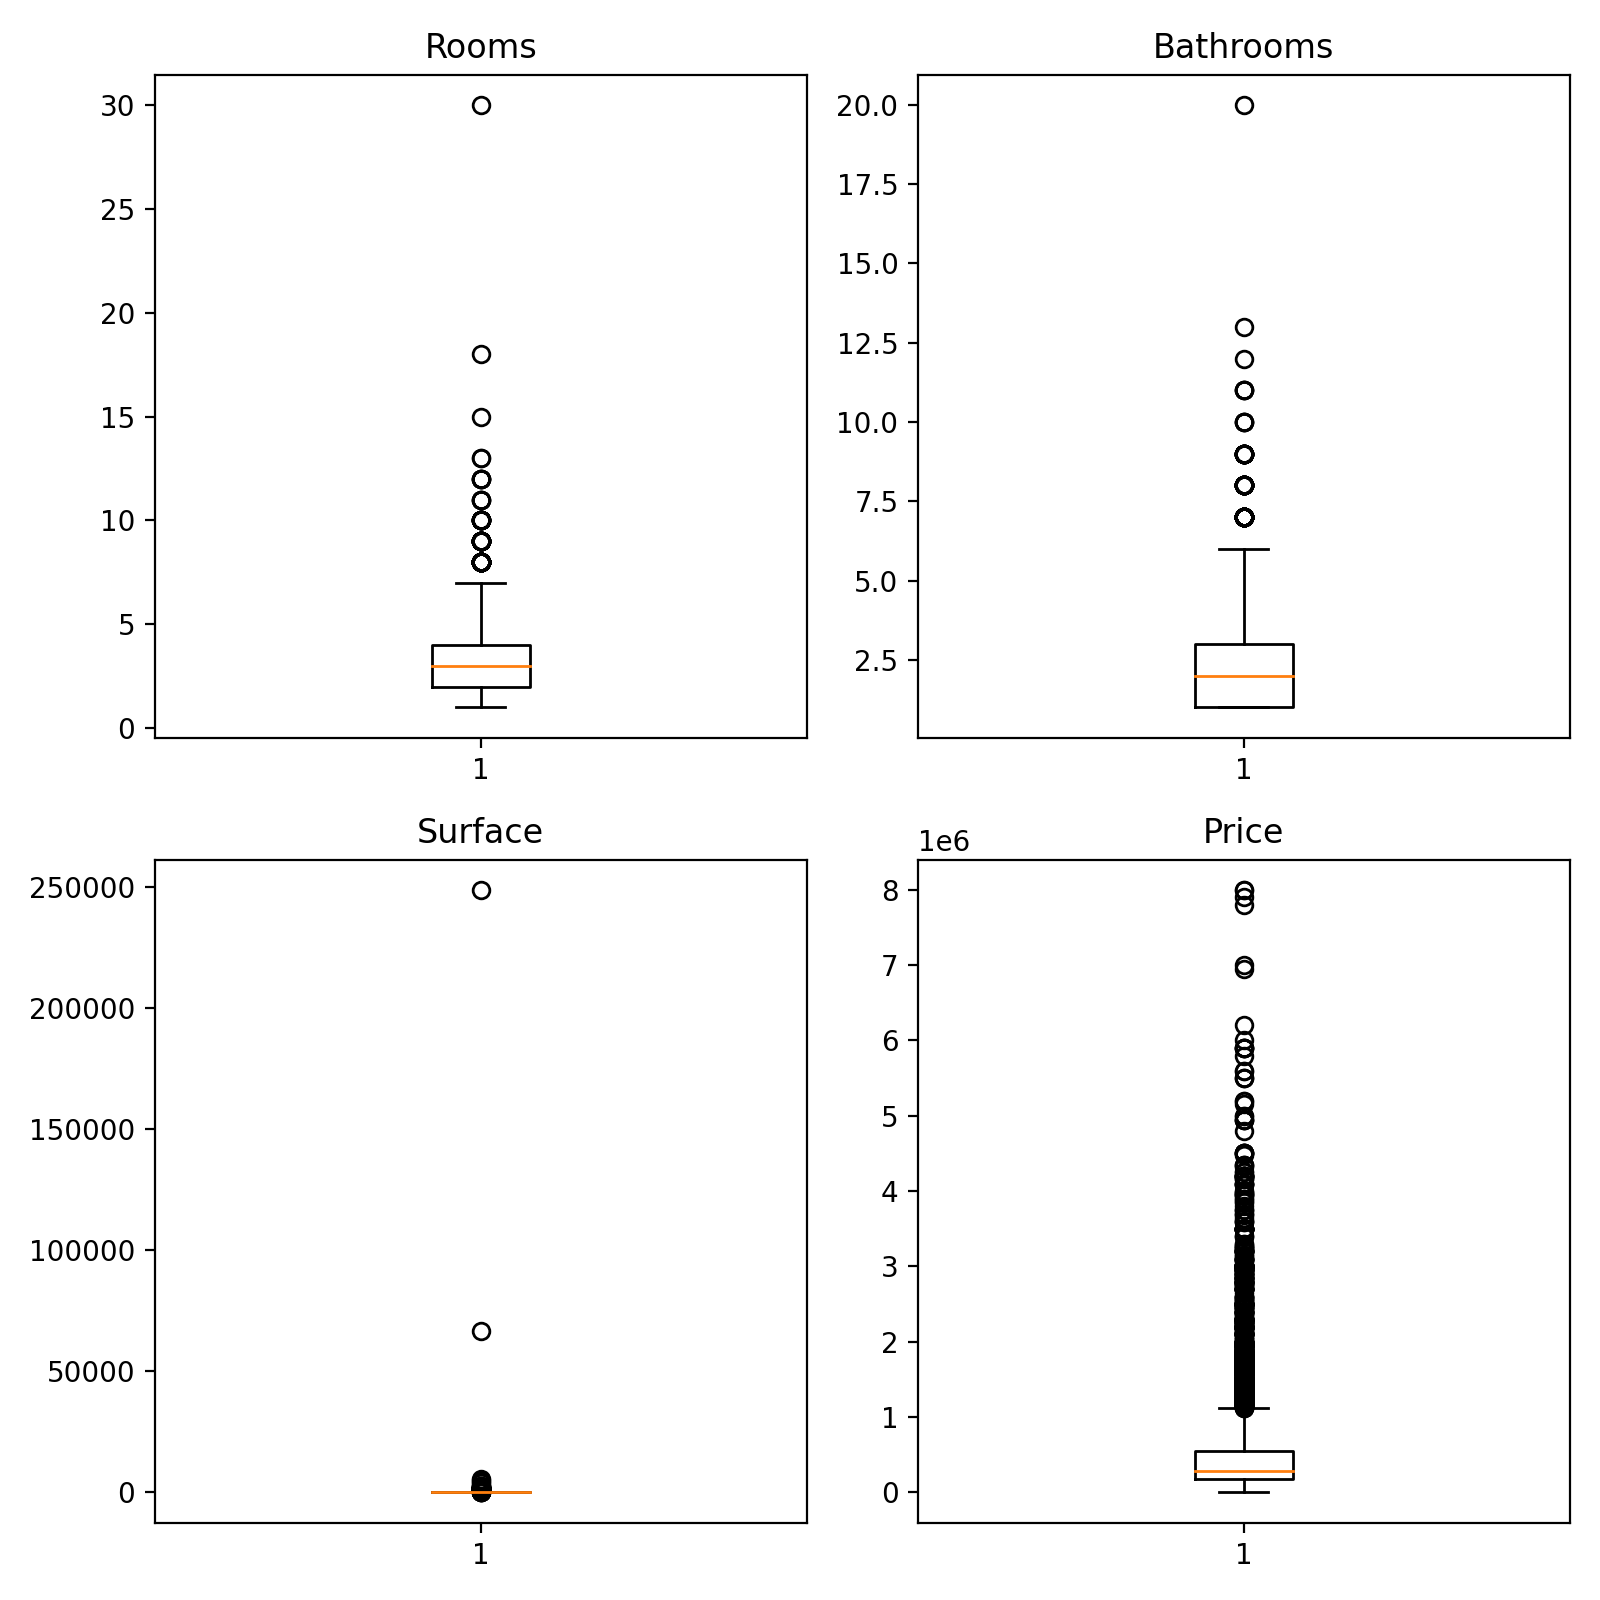

In [43]:
# TODO
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].boxplot(ds['rooms'])
axs[0, 0].set_title('Rooms')


axs[0, 1].boxplot(ds['bathrooms'])
axs[0, 1].set_title('Bathrooms')


axs[1, 0].boxplot(ds['surface'])
axs[1, 0].set_title('Surface')

axs[1, 1].boxplot(ds['price'])
axs[1, 1].set_title('Price')


plt.tight_layout()

plt.show()

La cantidad de outliners en surface y price no dejan visualizar bien ambas tablas, elimine algunos datos con el IQR y volvi a graficar

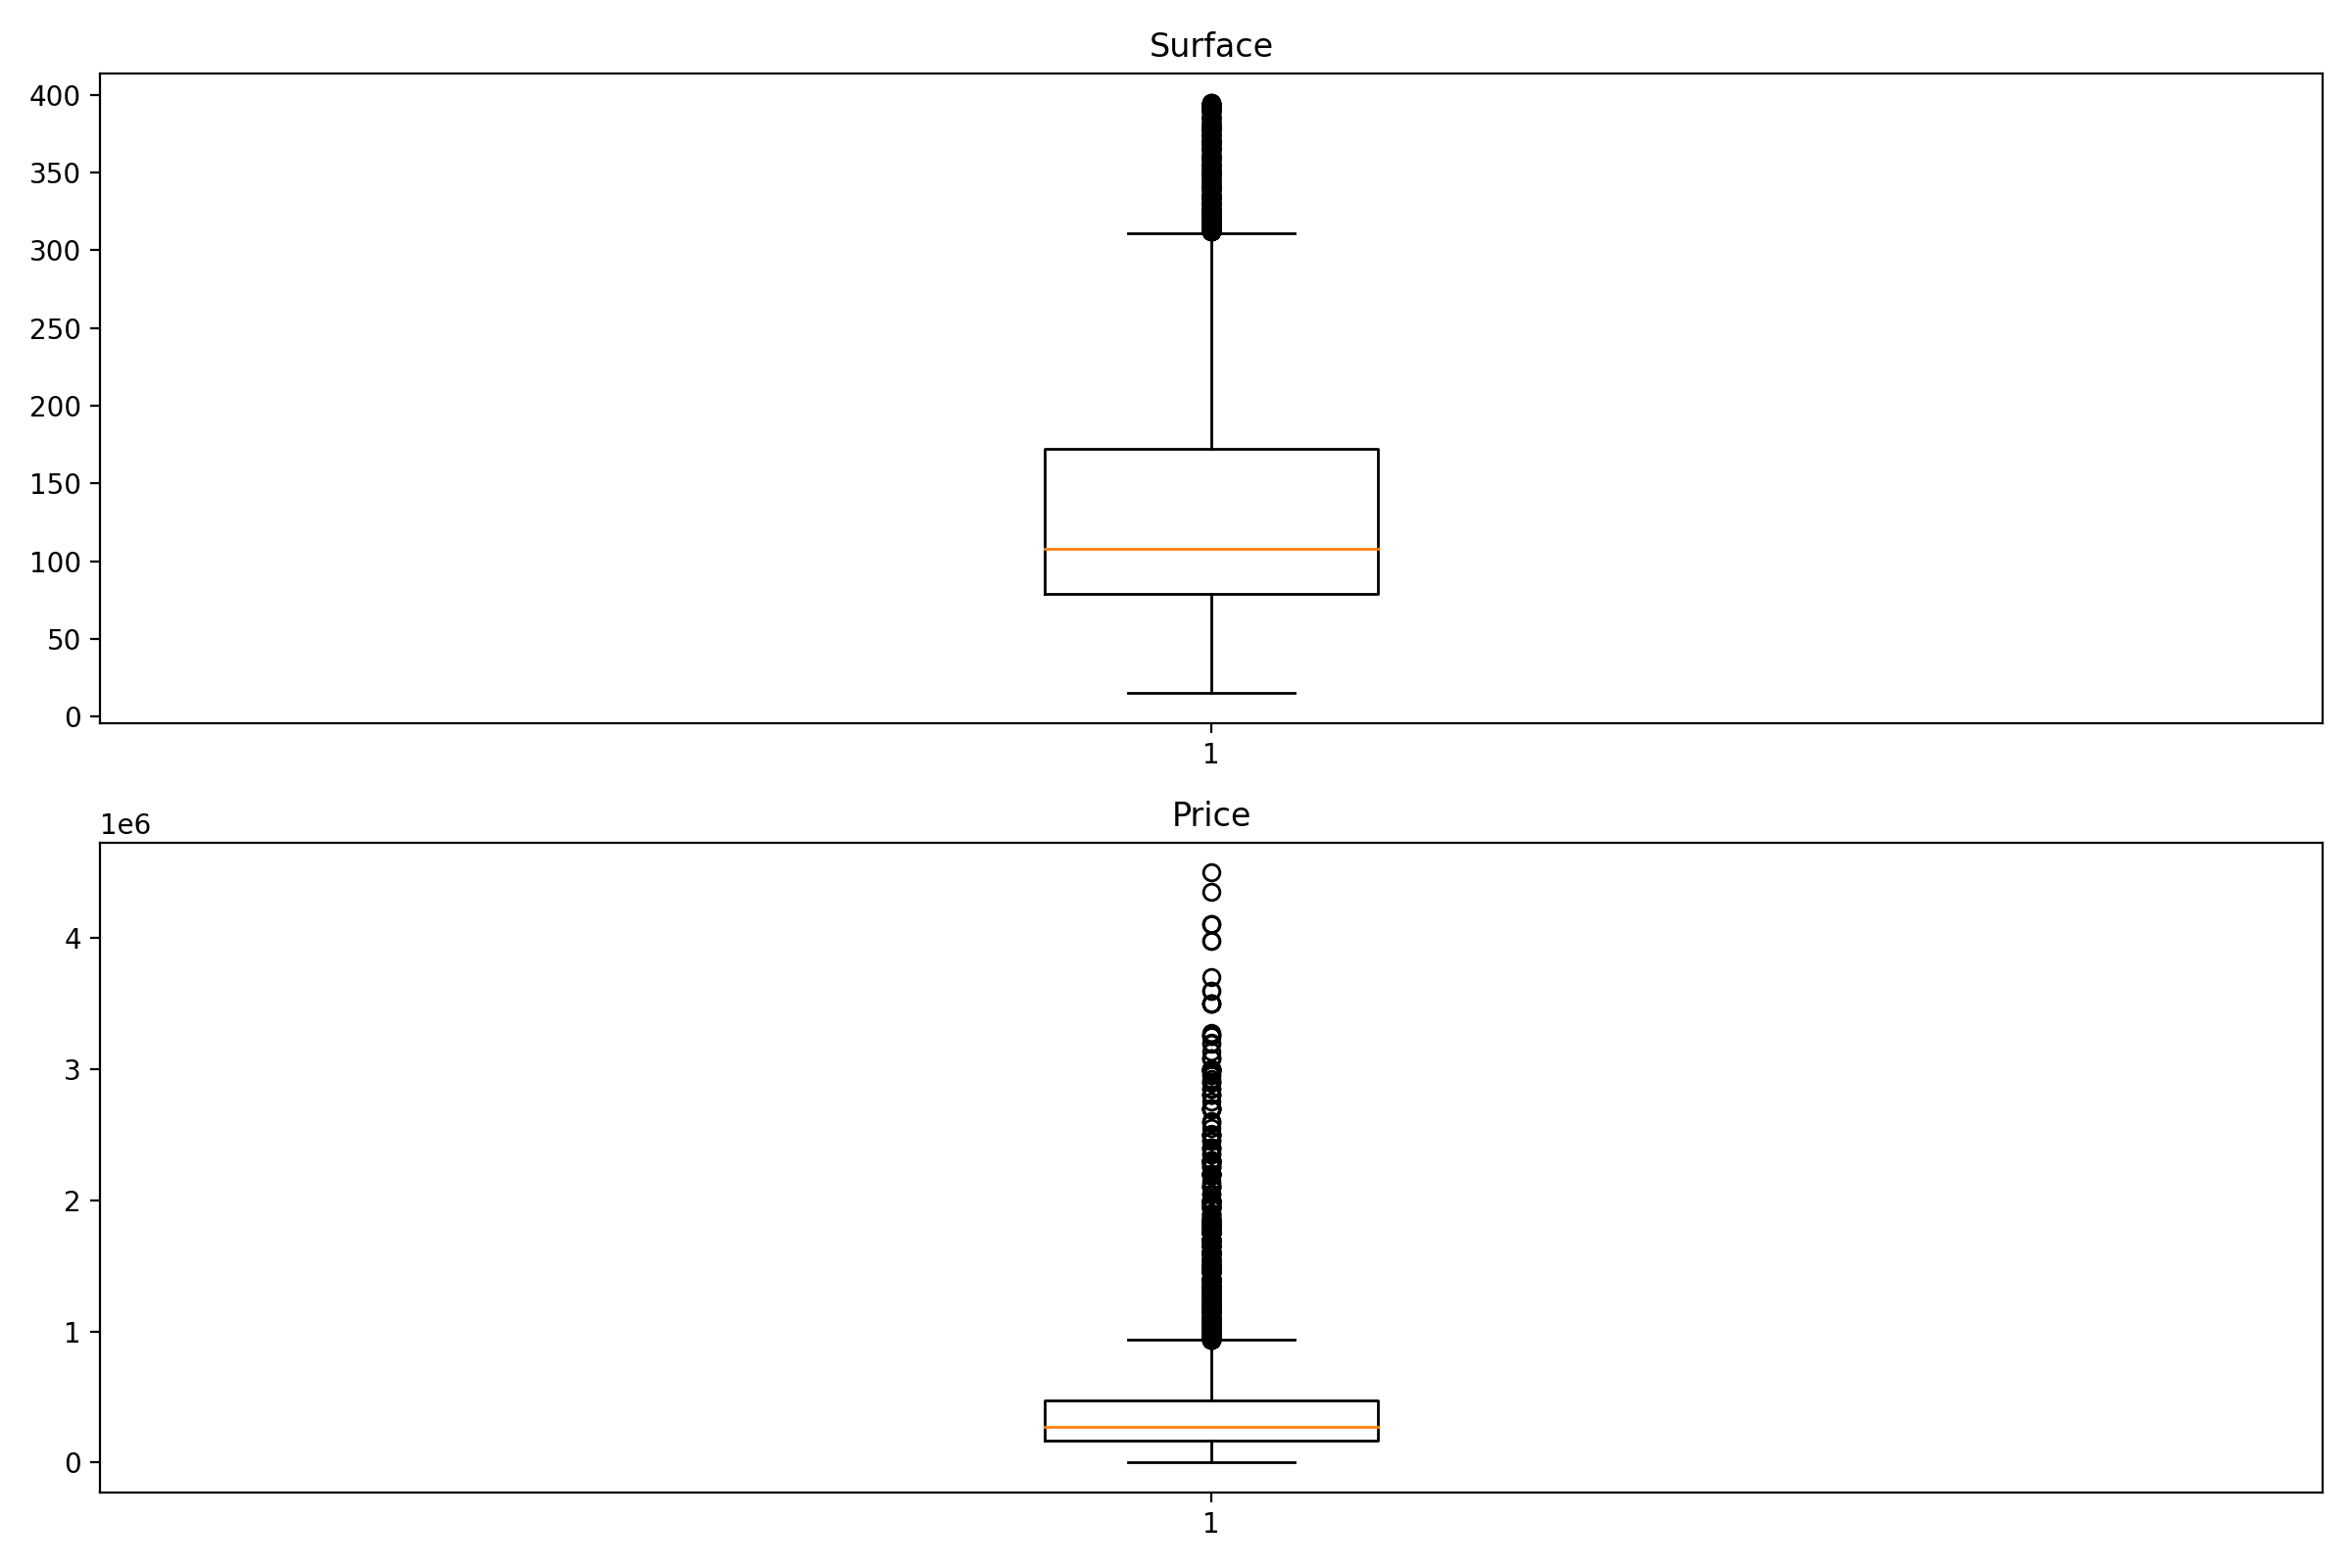

In [51]:

Q1 = ds['price'].quantile(0.25)
Q3 = ds['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
ds_copia = ds[(ds['price'] >= lower_limit) & (ds['price'] <= upper_limit)]
Q1 = ds['surface'].quantile(0.25)
Q3 = ds['surface'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
ds_copia = ds[(ds['surface'] >= lower_limit) & (ds['surface'] <= upper_limit)]
# Crear los subplots
fig, axs = plt.subplots(2, 1, figsize=(12,8))

# Boxplot de 'surface'
axs[0].boxplot(ds_copia['surface'])
axs[0].set_title('Surface')

# Boxplot de 'price'
axs[1].boxplot(ds_copia['price'])
axs[1].set_title('Price')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()